# Problem statement

* A retail company 'XYZ pvt ltd' wants to understand the purchase behaviour of the customer for the different products categories. They have shared the data about purchase summary of customer and also details of customer like gender, age, city etc. We will try to explore different trends from the Black Friday shopping dataset. 

# Importing libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading the dataset

In [2]:
df= pd.read_csv('C://Users//Bikash//Downloads//DATASET FOR EDA//Dataset//data6//blackFriday_train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

# statistical  info

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## checking data types 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Checking unique customers 

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### insights

* Average purchase is 9263.968713
* Maximum purchase is 23961
* Dataset has 7 numerical and 5 categorical features
* There are 5891 unique customers

# Univariate analysis


* gender

<function matplotlib.pyplot.show(close=None, block=None)>

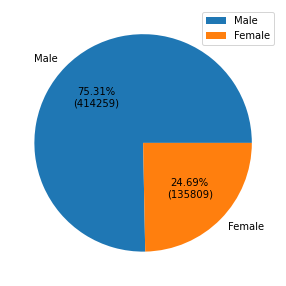

In [8]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['Gender'].value_counts().sum())))
plt.legend()
plt.show

* City Category

<function matplotlib.pyplot.show(close=None, block=None)>

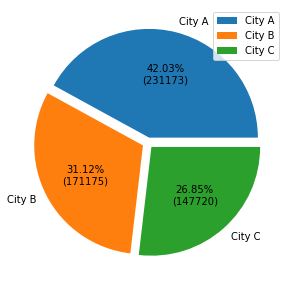

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df['City_Category'].value_counts(),explode = (0.05,0.05,0.05),labels=['City A','City B','City C'],autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['City_Category'].value_counts().sum())))
plt.legend()
plt.show

* Age

In [62]:
df['Age'].value_counts().sort_values(ascending=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

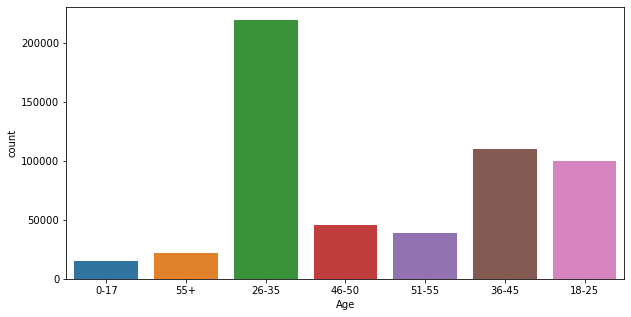

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.show()

* purchase

<function matplotlib.pyplot.show(close=None, block=None)>

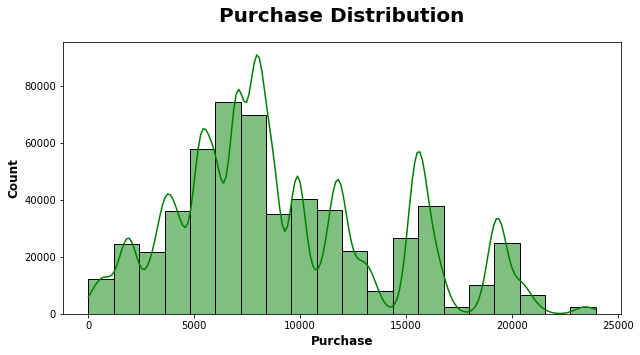

In [26]:
plt.figure(figsize=(10,5))
plt.title("Purchase Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Purchase", weight="bold", fontsize=12)
sns.histplot(df['Purchase'],kde=True,bins=20,color='g')
plt.show

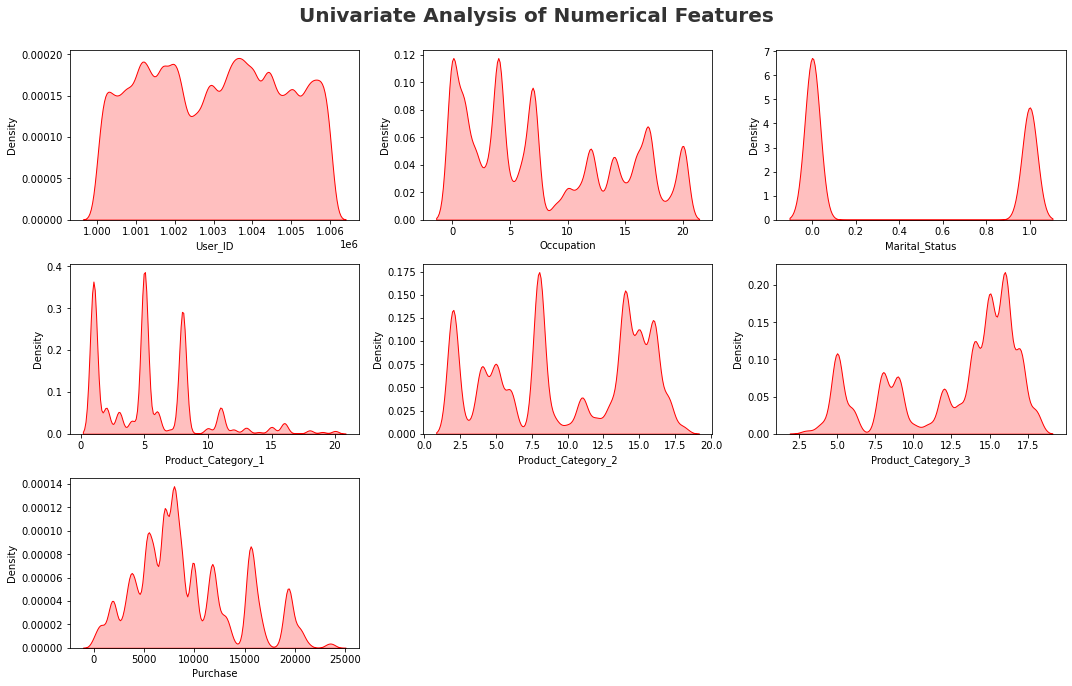

In [27]:
numerical_columns= [i for i in df.columns if df[i].dtype!='O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

* occupation

<function matplotlib.pyplot.show(close=None, block=None)>

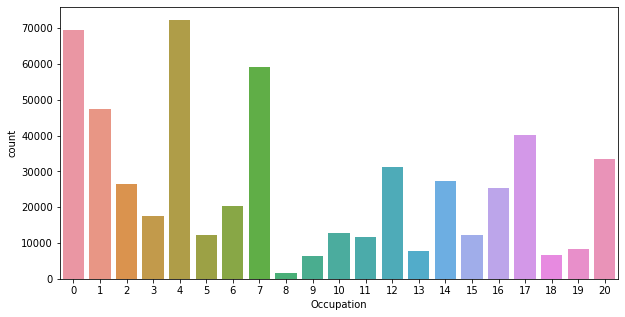

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['Occupation'])
plt.show

## Insights

* Almost 3/4th  of the customers are male
* Most of the customers are between 26-35 age group
* customer with occuption id as 4 are most in numbers and id with 8 is least in number 
* Among three city categories most number of customers are from city A

# Multivariate analysis

# * gender vs purchase analysis

In [59]:
df.groupby('Gender')['Purchase'].sum().sort_values(ascending=False)

Gender
M    3909580100
F    1186232642
Name: Purchase, dtype: int64

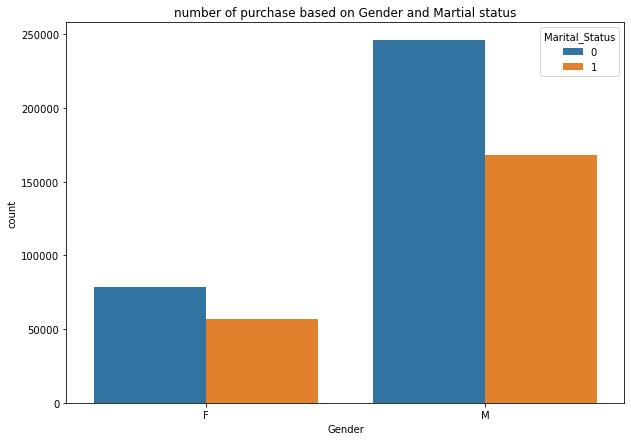

In [18]:
plt.figure(figsize=(10,7))
plt.title("number of purchase based on Gender and Martial status")
sns.countplot(df['Gender'],hue=df['Marital_Status'])
plt.show()

# * Age vs purchase  analysis

In [58]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=False)

Age
26-35    2031770578
36-45    1026569884
18-25     913848675
46-50     420843403
51-55     367099644
55+       200767375
0-17      134913183
Name: Purchase, dtype: int64

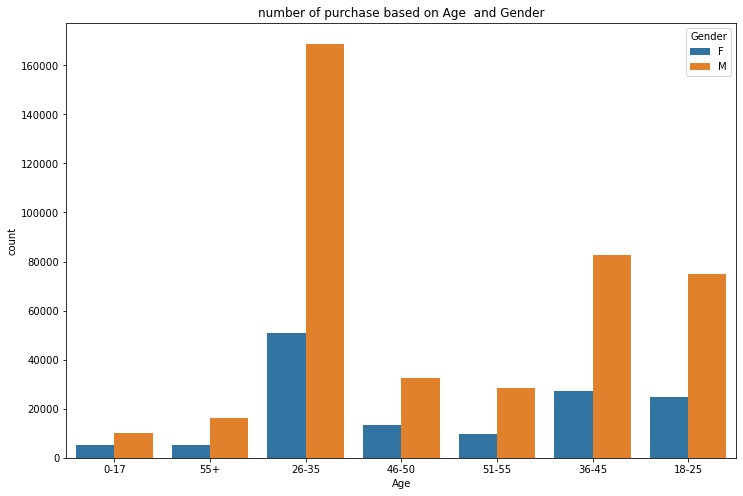

In [20]:
plt.figure(figsize=(12,8))
plt.title("number of purchase based on Age  and Gender")
sns.countplot(df['Age'],hue=df['Gender'])
plt.show()

# * Product Categories vs purchase  analysis based on gender 

In [49]:
product_data=df.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False)
product_data

Product_Category_1
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'Product_Category_3 used by Gender')

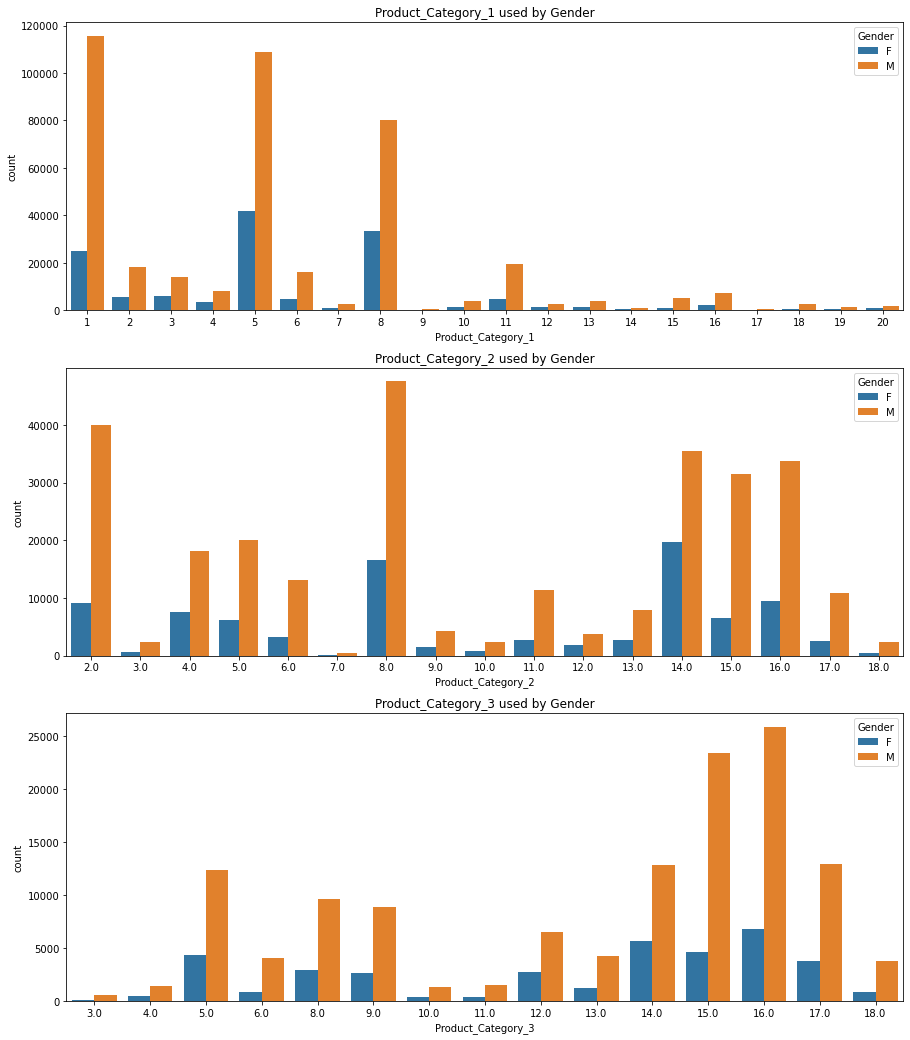

In [21]:
plt.figure(figsize=(15,18))
plt.subplot(311)
sns.countplot(df['Product_Category_1'],hue=df['Gender'])
plt.title('Product_Category_1 used by Gender')

plt.subplot(312)
sns.countplot(df['Product_Category_2'],hue=df['Gender'])
plt.title('Product_Category_2 used by Gender')

plt.subplot(313)
sns.countplot(df['Product_Category_3'],hue=df['Gender'])
plt.title('Product_Category_3 used by Gender')

# * Product category vs purchase analysis based on city category

In [35]:
df.groupby('City_Category')['Purchase'].sum().sort_values(ascending=False)

City_Category
B    2115533605
C    1663807476
A    1316471661
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'Product_Category_3 used by City C')

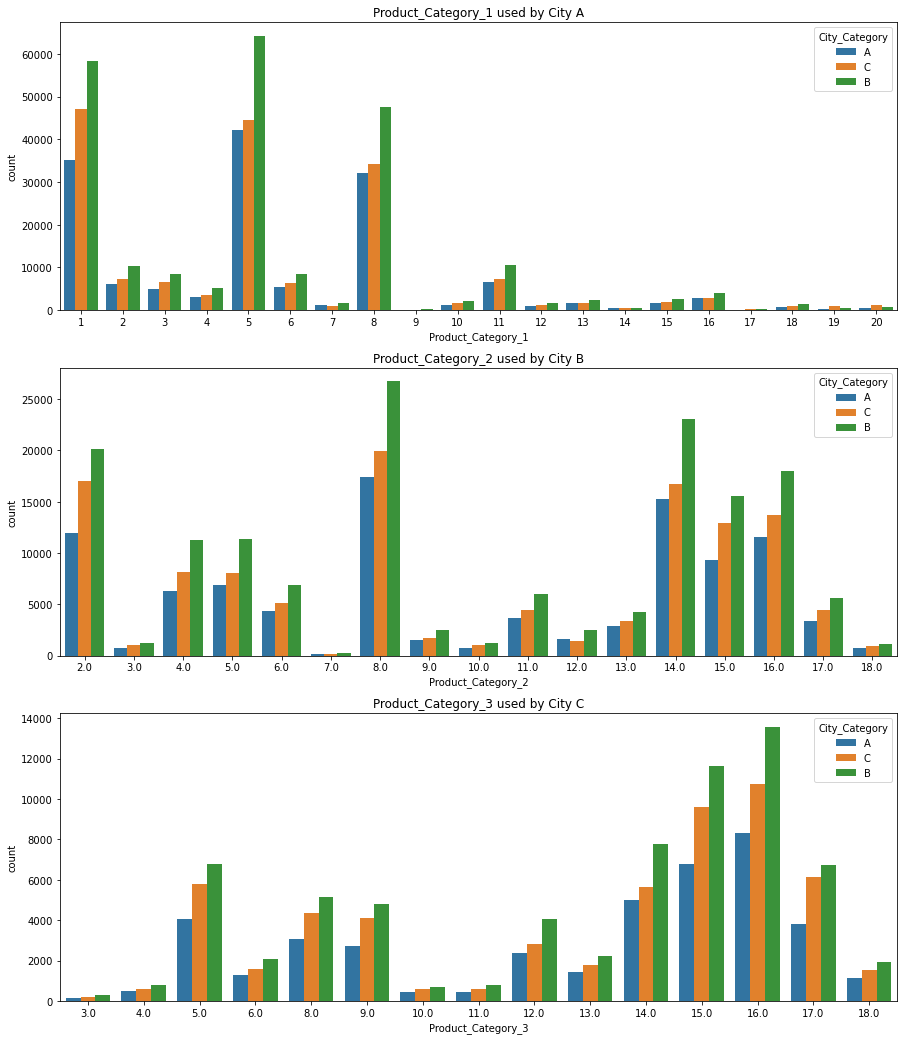

In [22]:
plt.figure(figsize=(15,18))
plt.subplot(311)
sns.countplot(df['Product_Category_1'],hue=df['City_Category'])
plt.title('Product_Category_1 used by City A')

plt.subplot(312)
sns.countplot(df['Product_Category_2'],hue=df['City_Category'])
plt.title('Product_Category_2 used by City B')

plt.subplot(313)
sns.countplot(df['Product_Category_3'],hue=df['City_Category'])
plt.title('Product_Category_3 used by City C')

# * Checking which age group has done maximum number of purchase 

In [33]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=False)

Age
26-35    2031770578
36-45    1026569884
18-25     913848675
46-50     420843403
51-55     367099644
55+       200767375
0-17      134913183
Name: Purchase, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

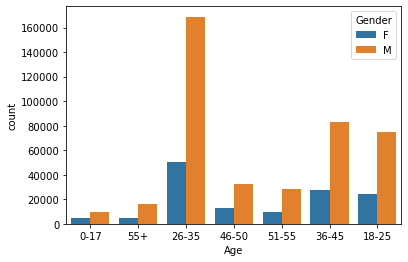

In [23]:
sns.countplot(df['Age'],hue=df['Gender'])

# * checking which occupation has done maximum number of purchase 

In [32]:
df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False)

Occupation
4     666244484
0     635406958
7     557371587
1     424614144
17    393281453
12    305449446
20    296570442
14    259454692
16    238346955
2     238028583
6     188416784
3     162002168
15    118960211
10    115844465
5     113649759
11    106751618
19     73700617
13     71919481
18     60721461
9      54340046
8      14737388
Name: Purchase, dtype: int64

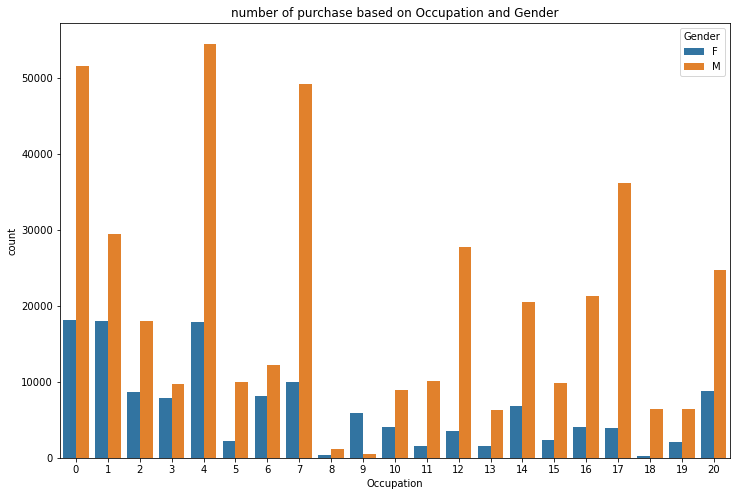

In [24]:
plt.figure(figsize=(12,8))
plt.title("number of purchase based on Occupation and Gender")
sns.countplot(df['Occupation'],hue=df['Gender'])
plt.show()

# * Checking multicollinearity

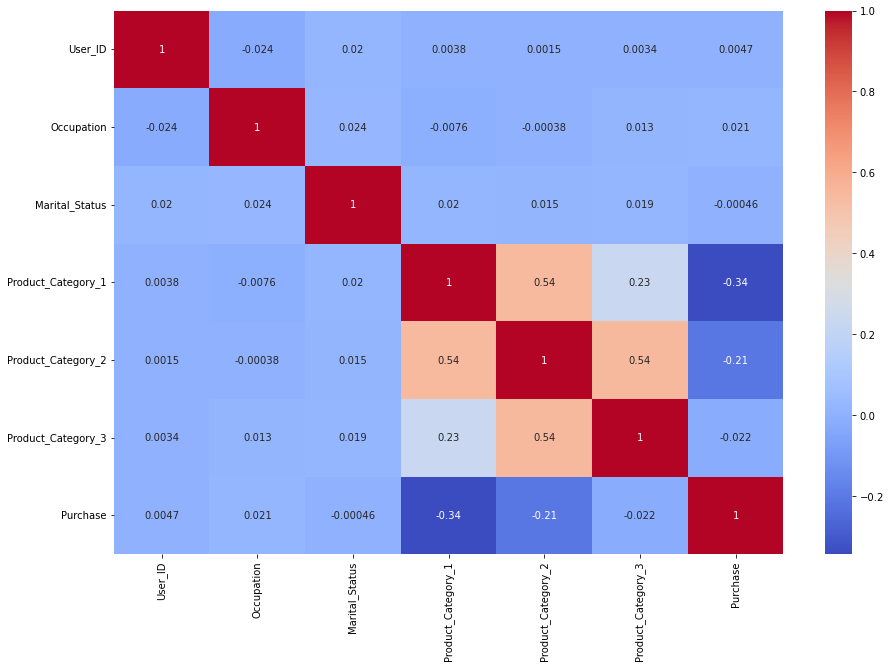

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

# Insights

* There are more male customers than female customer in which most are unmarried.
* The customers age between 26-35 are most in number as well as in purchase amount.
*  From Product_category_1 the most sold item is 1st item  Similarly product_category_2 has most sells in 4th item and from product_category_3 16th item is most sold.
* Customer comes from City_Category B has the largest amount purchase. 
* Customer with occupation ID 4 are most in number as well as in purchase amount.

# Feature Engineering

# * Outlier removal from Purchase Feature

In [75]:
Q1= np.percentile(df['Purchase'],25)
Q3= np.percentile(df['Purchase'],75)
IQR= Q3-Q1
maximum= Q3+1.5*(IQR)
minimum= Q1-1.5*(IQR)
df= df[df['Purchase']<= maximum]
df= df[df['Purchase']>= minimum]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     547391 non-null  int64  
 1   Product_ID                  547391 non-null  object 
 2   Gender                      547391 non-null  object 
 3   Age                         547391 non-null  object 
 4   Occupation                  547391 non-null  int64  
 5   City_Category               547391 non-null  object 
 6   Stay_In_Current_City_Years  547391 non-null  object 
 7   Marital_Status              547391 non-null  int64  
 8   Product_Category_1          547391 non-null  int64  
 9   Product_Category_2          374165 non-null  float64
 10  Product_Category_3          166180 non-null  float64
 11  Purchase                    547391 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.3+ MB


# * Dropping User_ID and Product_ID column which are not useful in prediction

In [77]:
df=df.drop(['User_ID','Product_ID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      547391 non-null  object 
 1   Age                         547391 non-null  object 
 2   Occupation                  547391 non-null  int64  
 3   City_Category               547391 non-null  object 
 4   Stay_In_Current_City_Years  547391 non-null  object 
 5   Marital_Status              547391 non-null  int64  
 6   Product_Category_1          547391 non-null  int64  
 7   Product_Category_2          374165 non-null  float64
 8   Product_Category_3          166180 non-null  float64
 9   Purchase                    547391 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 45.9+ MB


# * Checking Null values

In [78]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173226
Product_Category_3            381211
Purchase                           0
dtype: int64

* 381211/547391= 0.69
* There are 69 % missing values in Product_Category_3 column. So we remove this column also 

In [80]:
df=df.drop(['Product_Category_3'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      547391 non-null  object 
 1   Age                         547391 non-null  object 
 2   Occupation                  547391 non-null  int64  
 3   City_Category               547391 non-null  object 
 4   Stay_In_Current_City_Years  547391 non-null  object 
 5   Marital_Status              547391 non-null  int64  
 6   Product_Category_1          547391 non-null  int64  
 7   Product_Category_2          374165 non-null  float64
 8   Purchase                    547391 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 41.8+ MB


# * Filling Product_Category_2 null values with the mean 

In [81]:
df['Product_Category_2'].fillna((df['Product_Category_2'].mean()),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      547391 non-null  object 
 1   Age                         547391 non-null  object 
 2   Occupation                  547391 non-null  int64  
 3   City_Category               547391 non-null  object 
 4   Stay_In_Current_City_Years  547391 non-null  object 
 5   Marital_Status              547391 non-null  int64  
 6   Product_Category_1          547391 non-null  int64  
 7   Product_Category_2          547391 non-null  float64
 8   Purchase                    547391 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 41.8+ MB


# * Converting 4 categrical columns to one hot encoded vectors 

In [83]:
df=pd.get_dummies(df,columns=['Gender','Age','City_Category','Stay_In_Current_City_Years'])


In [86]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Occupation                     547391 non-null  int64
 1   Marital_Status                 547391 non-null  int64
 2   Product_Category_1             547391 non-null  int64
 3   Product_Category_2             547391 non-null  int32
 4   Purchase                       547391 non-null  int64
 5   Gender_F                       547391 non-null  uint8
 6   Gender_M                       547391 non-null  uint8
 7   Age_0-17                       547391 non-null  uint8
 8   Age_18-25                      547391 non-null  uint8
 9   Age_26-35                      547391 non-null  uint8
 10  Age_36-45                      547391 non-null  uint8
 11  Age_46-50                      547391 non-null  uint8
 12  Age_51-55                      547391 non-null  uint8
 13 

In [88]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,9,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# * Splitting the data

In [90]:
X= df.drop(columns=['Purchase'])
y= df['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# * Feature scaling

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [96]:
X_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.239352,1.201072,-1.115196,-0.368497,-0.572614,0.572614,-0.168815,-0.47035,-0.815061,1.999663,...,-0.273924,-0.201466,1.647417,-0.851134,-0.671297,-0.394948,1.354719,-0.476909,-0.457224,-0.426913
1,1.060754,-0.832590,-0.605821,-1.315891,-0.572614,0.572614,-0.168815,-0.47035,1.226902,-0.500084,...,-0.273924,-0.201466,-0.607011,-0.851134,1.489653,-0.394948,1.354719,-0.476909,-0.457224,-0.426913
2,0.294052,-0.832590,-1.115196,-1.789587,1.746376,-1.746376,5.923653,-0.47035,-0.815061,-0.500084,...,-0.273924,-0.201466,-0.607011,1.174903,-0.671297,-0.394948,-0.738161,2.096837,-0.457224,-0.426913
3,-1.239352,1.201072,-0.096446,1.052593,-0.572614,0.572614,-0.168815,-0.47035,1.226902,-0.500084,...,-0.273924,-0.201466,-0.607011,1.174903,-0.671297,-0.394948,-0.738161,-0.476909,2.187112,-0.426913
4,0.600732,1.201072,-0.096446,-0.131649,-0.572614,0.572614,-0.168815,-0.47035,-0.815061,1.999663,...,-0.273924,-0.201466,-0.607011,1.174903,-0.671297,-0.394948,-0.738161,2.096837,-0.457224,-0.426913
